*Practical Assignment => Multiple Linear Regression and Support Vector Regression (SVR)  with Medical Cost Personal Datasets*
- General Instructions:
    - You will use the "Medical Cost Personal Datasets" dataset.  Make sure you have downloaded this dataset.
    - Use the Python programming language and appropriate libraries such as NumPy, Pandas, Matplotlib and Scikit-Learn to perform regression and SVR analysis. 
- Description: 
    - Identify the variables that will be used as independent variables (features) and target variables (personal medical costs).
    - Divide the dataset into training data and test data with appropriate proportions.
    - Perform feature scaling if necessary.
    - Create a multiple linear regression model using Scikit-Learn.
    - Train the model on training data and make predictions on test data.
    - Evaluate the model by calculating metrics such as R-squared, MSE, and MAE.  Show evaluation results.
- Additional Notes:
    - Be sure to provide a brief explanation of the dataset used, including a description of the relevant variables.
    - Show relevant data visualizations such as scatter plots or other graphs if necessary for better understanding.
    - Analyze the results you got in your practical assignment. 

# **Load and show first 10 Data** 

In [581]:
import pandas as pd
# load dataset(raw data) from csv to pandas dataframe
df = pd.read_csv('Data/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# **Data Information**

In [582]:
# show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Data Description**

In [583]:
# show data description
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Data Encoding**

**Analytical:** Before we visualize data, if we have categorical data, we need to encode it to numerical data. 
In this dataset, we have three categorical: sex, smoker, and region.

In this case, we will use the OneHotEncoder method to encode the categorical data.
Why we use OneHotEncoder?, because the data is not in order or rank, if the data is in order or rank,
we can use the LabelEncoder method, but in this case, we use the OneHotEncoder method that is more suitable for non-order or non-rank data.

what means drop_first=True?
In the context of dummy variable encoding and regression models, the reference category (or baseline category)
is the category that is omitted (or "dropped") when creating dummy variables. This dropped category serves 
as a benchmark or baseline against which the effects of the other categories are measured.

Understanding the Reference Category
- Role in Regression Models:
    - Baseline: The reference category represents the "default" or "baseline" case. The coefficients of the dummy variables
    for the other categories represent the difference in the response variable compared to this baseline.
    - Interpretation: If a category is omitted, the effect of the other categories is interpreted relative to this omitted
    category. For instance, if you are predicting house prices, and you omit the "Small" house size as the reference category,
    the coefficients for "Medium" and "Large" house sizes will show how these sizes compare to the "Small" size in terms of price.

- Avoiding Multi collinearity
    - Multi collinearity Issue: Including dummy variables for all categories in a regression model leads to multi collinearity
    because the dummy variables are linearly dependent. The dropped category helps avoid this problem by ensuring that the dummy variables are independent.
    - Mathematical Example: If you have categories A, B, and C, and you include dummy variables for all three,
    you can perfectly predict one category if you know the other two. By dropping one category (say, A), you prevent this perfect linear dependency.

In [584]:
# encode categorical data with simple OneHotEncoder
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)
# Ensure 'charges' column is separated before reordering
charges = df['charges']
df = df.drop(columns='charges')
# Reorder columns to move 'charges' to the end
df = pd.concat([df, charges], axis=1)
# show first 10 data after encoding
df.head(10)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
5,31,25.740,0,0,0,0,1,0,3756.62160
6,46,33.440,1,0,0,0,1,0,8240.58960
7,37,27.740,3,0,0,1,0,0,7281.50560
8,37,29.830,2,1,0,0,0,0,6406.41070
9,60,25.840,0,0,0,1,0,0,28923.13692


# **Data Visualization**

In [585]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Using Pair plot**


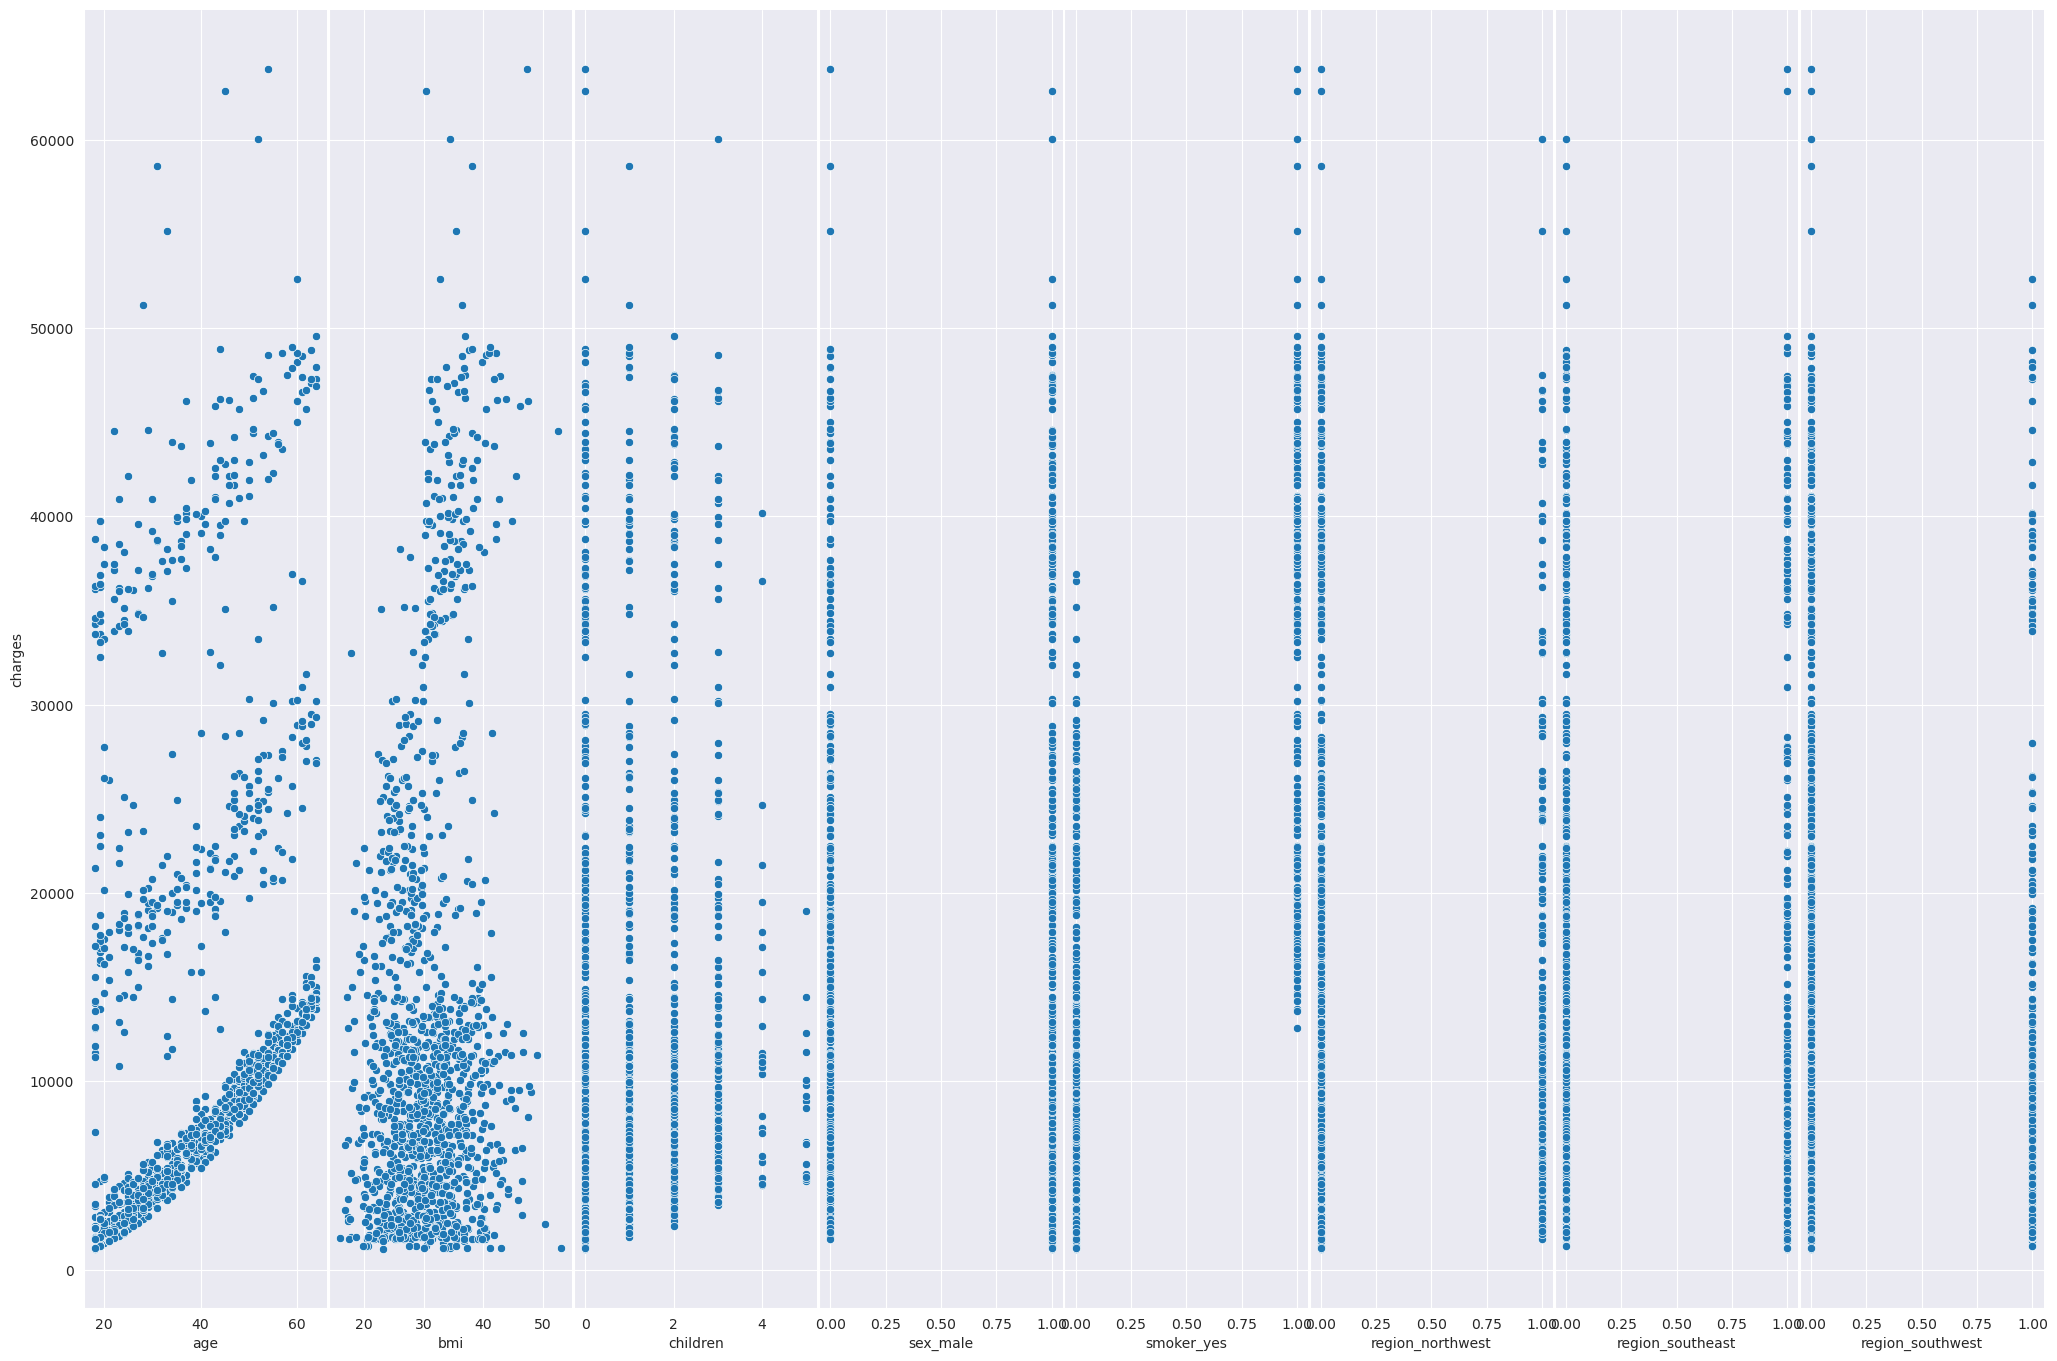

In [586]:
sns.pairplot(df, x_vars=df.columns[df.columns != 'charges'].to_list(), y_vars='charges', height=5, aspect=2, kind='scatter').fig.set_size_inches(20, 15)
plt.subplots_adjust(right=1)
plt.show()

## **Using Heat Map**

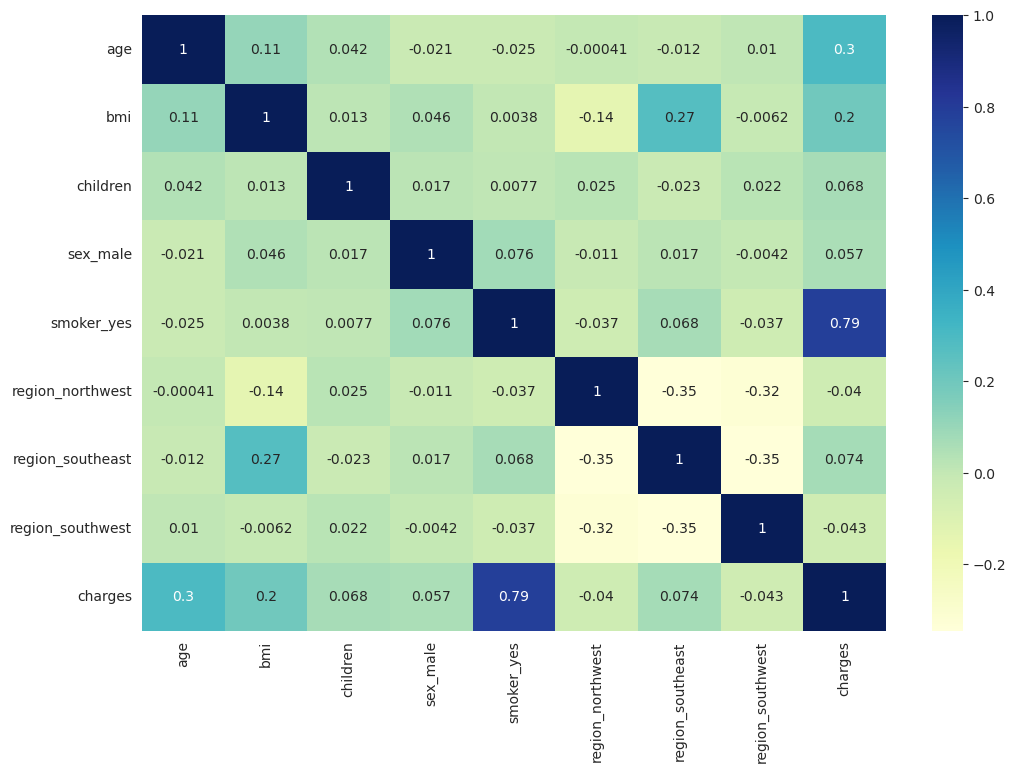

In [587]:
# show correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

# **Variable Selection**
**Analytical:** so as you can see in Data Visualization, just age, bmi, and smoker_yes have a strong correlation with charges.
Here explanation why other data is not selected:
- region: as you can see in heatmap, all 3 regions, just region_southeast has a strong correlation with charges, but this mean correlation with other regions is
diffidently low. so if we sum all regions with dummies variable that use baseline before, we had conclusion region is not 
- children: as you can see in heatmap, children have a low correlation with charges, so just ignore it
- sex: as you can see in heatmap, sex_male has a low correlation when we use dummies variable that use baseline before, so we can ignore it

**Conclusion:** so we will use age, bmi, and smoker_yes as independent(**X**) variables and charges as a dependent variable(**y**).

In [588]:
X = df[['age', 'bmi', 'smoker_yes']]
y = df['charges']

print(f'X: \n {X} \n\n y: \n {y}')

X: 
       age     bmi  smoker_yes
0      19  27.900           1
1      18  33.770           0
2      28  33.000           0
3      33  22.705           0
4      32  28.880           0
...   ...     ...         ...
1333   50  30.970           0
1334   18  31.920           0
1335   18  36.850           0
1336   21  25.800           0
1337   61  29.070           1

[1338 rows x 3 columns] 

 y: 
 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# **Feature Scaling**
**Analytical:** Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Because we use multiple linear regression, it is generally a good idea to standardize your independent variables (features), especially when they vary significantly in scale. Standardization ensures that all the features are on a comparable scale, which can improve the performance and interpretability of the model.

Why Standardization is Important in Multiple Linear Regression:
- Handling Different Scales: When your independent variables have different ranges (e.g., one variable ranges from 1 to 10, and another from 100 to 1000), the variable with the larger scale can dominate the model’s learning process. Standardization or normalization helps prevent this issue.
- Improving Model Convergence: Standardization helps some algorithms (like gradient descent in linear regression) converge faster by ensuring that features are centered around the same mean and variance.
- Interpretability of Coefficients: After standardization, the coefficients in multiple linear regression become more interpretable. You can compare the magnitude of the coefficients to assess the relative importance of features.

In [589]:
from sklearn.preprocessing import StandardScaler
# create different object for each column
# we do this, because scale each column vastly different
sc_X_age = StandardScaler()
sc_X_bmi = StandardScaler()
sc_X_smoker_yes = StandardScaler()
sc_y = StandardScaler()

# convert X data from int64 to float
# because FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas.
X = X.astype(float)

# fit and transform each column
X.loc[:, 'age'] = sc_X_age.fit_transform(X[['age']])
X.loc[:, 'bmi'] = sc_X_bmi.fit_transform(X[['bmi']])
X.loc[:, 'smoker_yes'] = sc_X_smoker_yes.fit_transform(X[['smoker_yes']])
y = sc_y.fit_transform(y.values.reshape(-1, 1))
y = y.ravel()

# Print the scaled features and target variable
print(f'X (scaled): \n{X} \n\n y (scaled): \n{y}')

X (scaled): 
           age       bmi  smoker_yes
0    -1.438764 -0.453320    1.970587
1    -1.509965  0.509621   -0.507463
2    -0.797954  0.383307   -0.507463
3    -0.441948 -1.305531   -0.507463
4    -0.513149 -0.292556   -0.507463
...        ...       ...         ...
1333  0.768473  0.050297   -0.507463
1334 -1.509965  0.206139   -0.507463
1335 -1.509965  1.014878   -0.507463
1336 -1.296362 -0.797813   -0.507463
1337  1.551686 -0.261388    1.970587

[1338 rows x 3 columns] 

 y (scaled): 
[ 0.2985838  -0.95368917 -0.72867467 ... -0.96159623 -0.93036151
  1.31105347]


# **Splitting Data**
**Analytical:** In machine learning, it is common practice to split the dataset into two subsets or three: training data and test data also validating if required.
The training data is used to train the model, while the test data is used to evaluate the model's performance, and validating as hyperparameter to tune the model.

The random_state parameter in the train_test_split function in scikit-learn is used to control the shuffling of data before splitting it into training and test sets. By default, train_test_split shuffles the data before splitting to ensure randomness, and the random_state serves as a seed for the random number generator.

When you pass a specific integer (like 42) to the random_state, it ensures that the shuffling and the splitting of the data are done in a consistent and reproducible way every time you run the code. This means that even if you run your code multiple times, with random_state=42, you will get the same split each time.

Here’s what happens when you pass random_state=42:
- Reproducibility: The split is deterministic and will always produce the same training and test sets across different runs.
- 42 as a number: The choice of 42 is arbitrary. It could be any number; it doesn’t have a special significance. However, 42 is famously known as "The Answer to the Ultimate Question of Life, the Universe, and Everything" from The Hitchhiker's Guide to the Galaxy, so it's commonly used for fun.

In [590]:
from sklearn.model_selection import train_test_split
# split data into training and test data with ratio 80% training : 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check Count each of the Variables
print(f'Count of Original Independent Variable: {X.shape[0]}')
print(f'Count of Training Independent Variable: {X_train.shape[0]}')
print(f'Count of Testing Independent Variable: {X_test.shape[0]}')
print(f'Count of Original Dependent Variable: {y.shape[0]}')
print(f'Count of Training Dependent Variable: {y_train.shape[0]}')
print(f'Count of Testing Dependent Variable: {y_test.shape[0]}')

Count of Original Independent Variable: 1338
Count of Training Independent Variable: 1070
Count of Testing Independent Variable: 268
Count of Original Dependent Variable: 1338
Count of Training Dependent Variable: 1070
Count of Testing Dependent Variable: 268


# **Regression Model Training**
**Analytical:** In machine learning, regression is a supervised learning technique used to predict continuous values. It is used to model the relationship between a dependent variable and one or more independent variables. 

The goal of regression is to find the best-fitting model to describe the relationship between the independent variables and the dependent variable. The best-fitting model is one that minimizes the difference between the predicted values and the actual values of the dependent variable.

Here description about Multiple linear regression and Support Vector Regression:
- Multiple Linear Regression:
    - Type: Supervised Learning
    - Category: Regression Algorithm
    - Description: An extension of linear regression that uses multiple independent variables to predict a continuous target. The relationship remains linear but involves more than one predictor.
- Support Vector Regression (SVR):
    - Type: Supervised Learning
    - Category: Regression Algorithm, derived from Support Vector Machines (SVM)
    - Description: A more complex regression model that attempts to find a hyperplane (or boundaries in higher dimensions) that best fits the data, within a certain margin. It can capture both linear and non-linear relationships using different kernel functions (e.g., linear, polynomial, RBF).


## **Multiple Linear Regression**

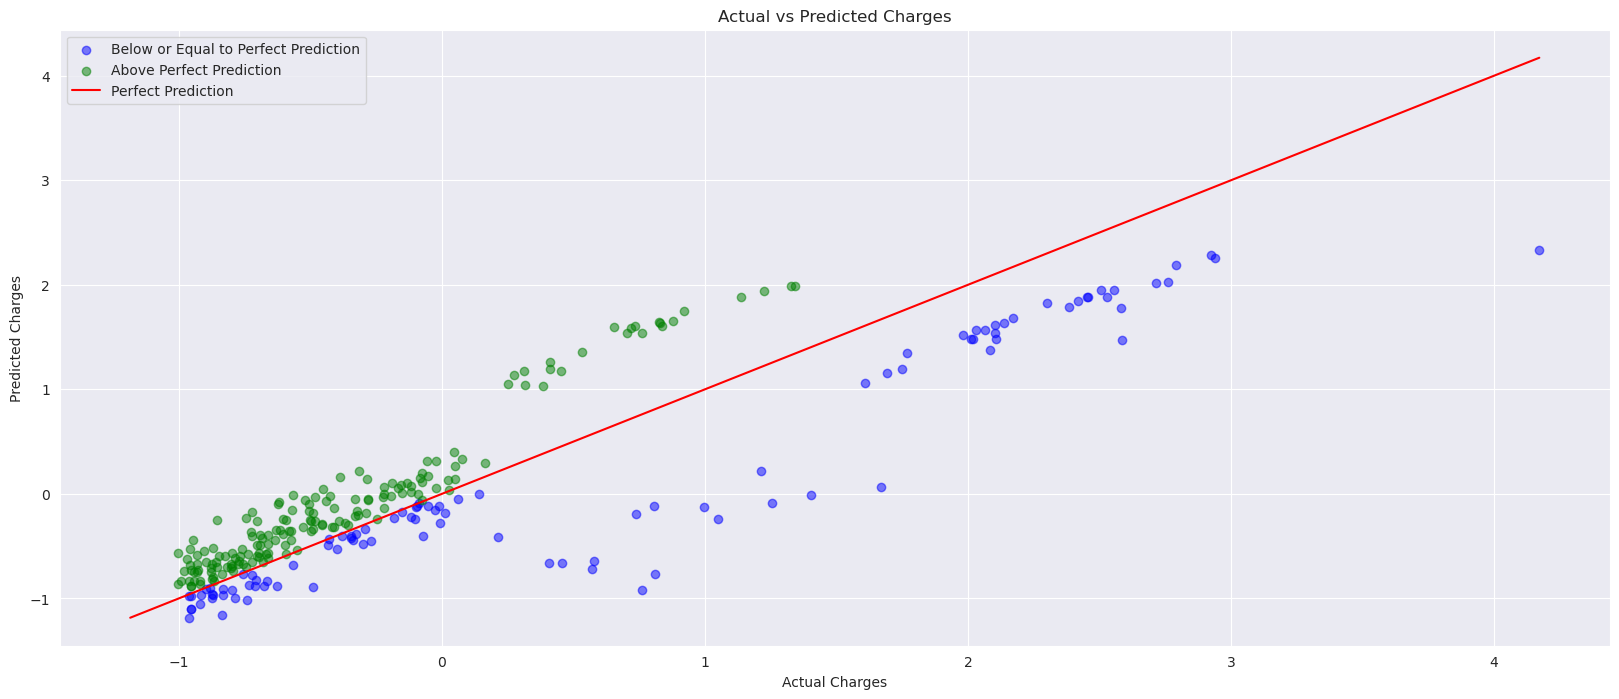

In [591]:
from sklearn.linear_model import LinearRegression
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_mlr = multiple_linear_regression.predict(X_test)

# Visualizing the regression line with multiple features isn't as straightforward,
# but you can plot the actual vs. predicted values for the training set.
# Visualize actual vs. predicted values for the test set
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(20, 8))

# Calculate perfect prediction line
max_value = max(max(y_test), max(y_pred_mlr))
min_value = min(min(y_test), min(y_pred_mlr))

# Scatter plot for Actual vs Predicted values
# Below the perfect prediction line
below_line = y_pred_mlr <= y_test
plt.scatter(y_test[below_line], y_pred_mlr[below_line], color='blue', alpha=0.5, label='Below or Equal to Perfect Prediction')

# Above the perfect prediction line
above_line = y_pred_mlr > y_test
plt.scatter(y_test[above_line], y_pred_mlr[above_line], color='green', alpha=0.5, label='Above Perfect Prediction')

# Plot a line representing perfect prediction (y = x)
plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Perfect Prediction')

# show result
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

## **Support Vector Regression** 

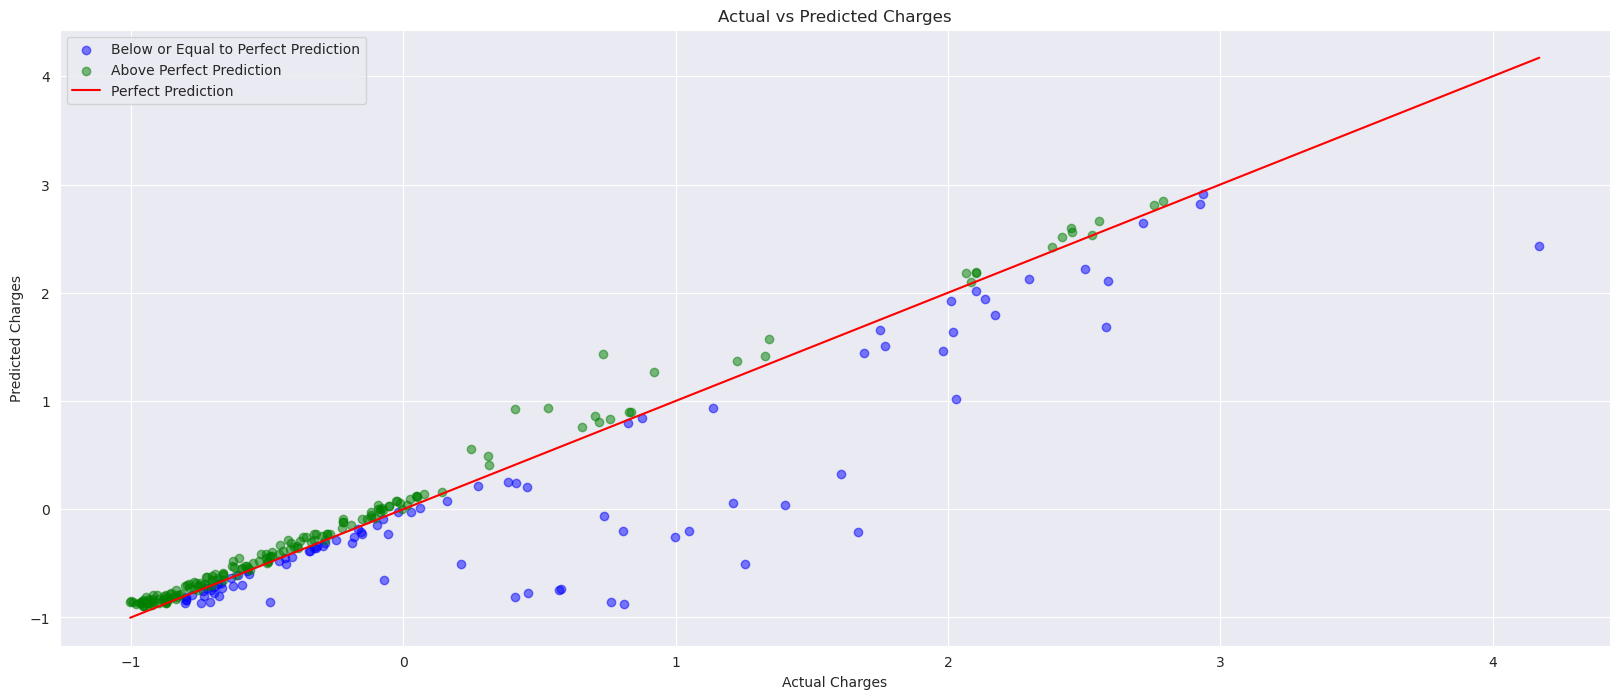

In [592]:
from sklearn.svm import SVR
support_vector_regression = SVR(kernel='rbf')
support_vector_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = support_vector_regression.predict(X_test)

# Visualize actual vs. predicted values for the test set
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(20, 8))

# Calculate perfect prediction line
max_value = max(max(y_test), max(y_pred_svr))
min_value = min(min(y_test), min(y_pred_svr))

# Scatter plot for Actual vs Predicted values
# Below the perfect prediction line
below_line = y_pred_svr <= y_test
plt.scatter(y_test[below_line], y_pred_svr[below_line], color='blue', alpha=0.5, label='Below or Equal to Perfect Prediction')

# Above the perfect prediction line
above_line = y_pred_svr > y_test
plt.scatter(y_test[above_line], y_pred_svr[above_line], color='green', alpha=0.5, label='Above Perfect Prediction')

# Plot a line representing perfect prediction (y = x)
plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Perfect Prediction')

# show result
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

# **Model Evaluation**

In [593]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
# evaluate multiple linear regression model
r2_mlr = r2_score(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)

# evaluate support vector regression model
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the evaluation metrics and compare Multiple Linear Regression and Support Vector Regression
print(f'MAE: \nMultiple Linear Regression: {mae_mlr} \nSupport Vector Regression: {mae_svr}')
print(f'\nMSE: \nMultiple Linear Regression: {mse_mlr} \nSupport Vector Regression: {mse_svr}')
print(f'\nRMSE: \nMultiple Linear Regression: {rmse_mlr} \nSupport Vector Regression: {rmse_svr}')
print(f'\nR2 Score: \nMultiple Linear Regression: {r2_mlr} \nSupport Vector Regression: {r2_svr}')

MAE: 
Multiple Linear Regression: 0.351952862665193 
Support Vector Regression: 0.17318836211481176

MSE: 
Multiple Linear Regression: 0.2355138005515096 
Support Vector Regression: 0.14092001899988077

RMSE: 
Multiple Linear Regression: 0.48529764119714164 
Support Vector Regression: 0.3753931525745785

R2 Score: 
Multiple Linear Regression: 0.7776932310583375 
Support Vector Regression: 0.8669824272305882


# **Conclusion**

**Analytical:** In this practical assignment, we performed multiple linear regression and support vector regression (SVR) on the "Medical Cost Personal Datasets" dataset. Here are the key points and conclusions from our analysis: 
- Dataset Description: The dataset contains information about personal medical costs, including features such as age, BMI (body mass index) and smoking status, as well as the target variable, medical charges.
- With the help of data visualization, we identified the key independent variables (features) that have a strong correlation with medical charges.
- We encoded the categorical variables using the OneHotEncoder method to prepare the data for regression analysis.
- We performed feature scaling to standardize the independent variables (features) and the target variable (medical charges).
- We split the data into training and test sets to train the regression models and evaluate their performance.
- We trained two regression models: Multiple Linear Regression and Support Vector Regression (SVR).
- We evaluated the models using metrics such as R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).
- Based on the evaluation results, we compared the performance of the Multiple Linear Regression and SVR models.
- The evaluation metrics showed that the SVR model outperformed the Multiple Linear Regression model in terms of R-squared and Mean Squared Error.
- The SVR model had a higher R-squared value, indicating that it explained more of the variance in the target variable (medical charges).
- The SVR model also had a lower Mean Squared Error, indicating that it had better predictive performance compared to the Multiple Linear Regression model.
- **Overall, the SVR model provided a better fit to the data and better predictive performance compared to the Multiple Linear Regression model.**
- In conclusion, the SVR model is a more suitable choice for predicting medical charges based on the given features in the dataset.
- Further analysis and optimization of the SVR model could be done to improve its performance and predictive accuracy.
- The results of this analysis can be used to gain insights into the factors that influence medical charges and to make informed decisions in the healthcare industry.
- The regression models can be further refined and optimized to improve their performance and generalization to new data.
- The analysis provides a practical example of applying regression techniques to real-world datasets and extracting valuable insights from the data.
- The analysis demonstrates the importance of data preprocessing, feature selection, model training, and evaluation in the machine learning workflow.
- The use of regression models can help in understanding the relationships between variables and making predictions based on historical data.
- The analysis highlights the importance of choosing appropriate regression models and evaluation metrics to achieve the desired outcomes in machine learning projects.